In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using Theano backend.


In [2]:
directory = 'price_long_50'
filenames = os.listdir(directory)
print(filenames)

all_data = np.zeros((len(filenames),2518),dtype = np.float32)
for i in range(len(filenames)):
    filename = filenames[i]
    print(i)
    print(filename)
  
    data=pd.read_csv(directory+'/'+filename)
    vars = ['Open']
    data = data[vars]
    data = np.array(data)
    data = np.transpose(data)
    data = data[0]
    data = data[::-1]
  
    all_data[i] = data
all_data=all_data.T
print(all_data.shape)  
#np.save('data',all_data)

['AAPL.csv', 'AMZN.csv', 'BA.csv', 'BAC.csv', 'BHP.csv', 'BRK-B.csv', 'CHL.csv', 'CMCSA.csv', 'CVX.csv', 'D.csv', 'DCM.csv', 'DIS.csv', 'DOW.csv', 'DUK.csv', 'EXC.csv', 'GE.csv', 'GOOGL.csv', 'HD.csv', 'INTC.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'MA.csv', 'MMM.csv', 'MO.csv', 'MRK.csv', 'MSFT.csv', 'NGG.csv', 'NTT.csv', 'NVS.csv', 'ORCL.csv', 'PEP.csv', 'PFE.csv', 'PG.csv', 'PTR.csv', 'RDS-B.csv', 'RIO.csv', 'SO.csv', 'SPY.csv', 'SYT.csv', 'T.csv', 'TM.csv', 'TOT.csv', 'UNH.csv', 'UPS.csv', 'VALE.csv', 'VZ.csv', 'WFC.csv', 'WMT.csv', 'XOM.csv']
0
AAPL.csv
1
AMZN.csv
2
BA.csv
3
BAC.csv
4
BHP.csv
5
BRK-B.csv
6
CHL.csv
7
CMCSA.csv
8
CVX.csv
9
D.csv
10
DCM.csv
11
DIS.csv
12
DOW.csv
13
DUK.csv
14
EXC.csv
15
GE.csv
16
GOOGL.csv
17
HD.csv
18
INTC.csv
19
JNJ.csv
20
JPM.csv
21
KO.csv
22
MA.csv
23
MMM.csv
24
MO.csv
25
MRK.csv
26
MSFT.csv
27
NGG.csv
28
NTT.csv
29
NVS.csv
30
ORCL.csv
31
PEP.csv
32
PFE.csv
33
PG.csv
34
PTR.csv
35
RDS-B.csv
36
RIO.csv
37
SO.csv
38
SPY.csv
39
SYT.csv
40
T.csv
41
TM.c

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
#data50=scaler.fit_transform(all_data)
data0=scaler.fit_transform(all_data[:,0:1])

In [4]:
def load_data(dataset, seq_len):
    amount_of_stocks = dataset.shape[1] # 5
    print(amount_of_stocks)
    data = np.array(dataset)
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    #y_train = train[:, -1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]
    #y_test = result[int(row):, -1]
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_stocks))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_stocks))  

    return [x_train, y_train, x_test, y_test]

In [5]:
look_back=3
X_train, y_train, X_test, y_test = load_data(data0, look_back)

1


In [6]:
#y_train=y_train.reshape(2263,50,1)
print (X_train.shape, y_train.shape)

((2263, 3, 1), (2263,))


In [7]:
model = Sequential()
model.add(LSTM(32, input_shape=(look_back,data0.shape[1]),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(32, input_shape=(look_back,data0.shape[1]), return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(32,kernel_initializer="uniform",activation='relu')) 

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_split=0.1,verbose=1)

Train on 2036 samples, validate on 227 samples
Epoch 1/100
2036/2036 [==============================] - 0s 125us/step - loss: 0.0560 - val_loss: 0.0330
Epoch 2/100
2036/2036 [==============================] - 0s 122us/step - loss: 0.0034 - val_loss: 0.0011
Epoch 3/100
2036/2036 [==============================] - 0s 121us/step - loss: 0.0017 - val_loss: 0.0014
Epoch 4/100
2036/2036 [==============================] - 0s 115us/step - loss: 0.0015 - val_loss: 5.9533e-04
Epoch 5/100
2036/2036 [==============================] - 0s 114us/step - loss: 0.0014 - val_loss: 7.2290e-04
Epoch 6/100
2036/2036 [==============================] - 0s 117us/step - loss: 0.0013 - val_loss: 6.2276e-04
Epoch 7/100
2036/2036 [==============================] - 0s 118us/step - loss: 0.0012 - val_loss: 5.6898e-04
Epoch 8/100
2036/2036 [==============================] - 0s 119us/step - loss: 0.0010 - val_loss: 5.2947e-04
Epoch 9/100
2036/2036 [==============================] - 0s 122us/step - loss: 0.0010 - val_l

Epoch 74/100
2036/2036 [==============================] - 0s 118us/step - loss: 4.8471e-04 - val_loss: 8.8866e-04
Epoch 75/100
2036/2036 [==============================] - 0s 108us/step - loss: 4.9561e-04 - val_loss: 6.8146e-04
Epoch 76/100
2036/2036 [==============================] - 0s 113us/step - loss: 4.3682e-04 - val_loss: 0.0019
Epoch 77/100
2036/2036 [==============================] - 0s 116us/step - loss: 5.0014e-04 - val_loss: 0.0024
Epoch 78/100
2036/2036 [==============================] - 0s 113us/step - loss: 4.7099e-04 - val_loss: 6.2045e-04
Epoch 79/100
2036/2036 [==============================] - 0s 143us/step - loss: 4.6958e-04 - val_loss: 4.8459e-04
Epoch 80/100
2036/2036 [==============================] - 0s 121us/step - loss: 4.7142e-04 - val_loss: 8.4017e-04
Epoch 81/100
2036/2036 [==============================] - 0s 119us/step - loss: 4.5493e-04 - val_loss: 0.0014
Epoch 82/100
2036/2036 [==============================] - 0s 114us/step - loss: 4.6056e-04 - val_los

In [8]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


In [119]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: {} MSE ({} RMSE)'.format(trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: {} MSE ({} RMSE)'.format(testScore, math.sqrt(testScore)))

Train Score: 0.0004551323970583882 MSE (0.021333832216889403 RMSE)
Test Score: 0.0010187857008847106 MSE (0.03191842259393015 RMSE)


In [14]:
trainPredict.shape

(2263, 1)

In [15]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

In [121]:
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 92.41 RMSE
Test Score: 130.89 RMSE


In [11]:
trainPredictPlot = np.empty_like(data0)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [12]:
testPredictPlot = np.empty_like(data0)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+look_back:len(data0)-1, :] = testPredict


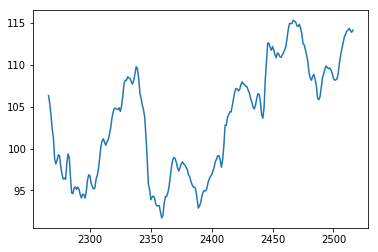

In [23]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data0))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



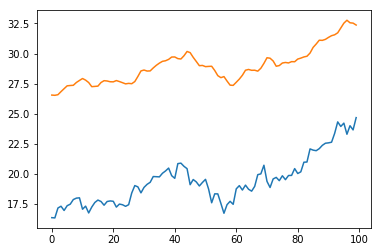

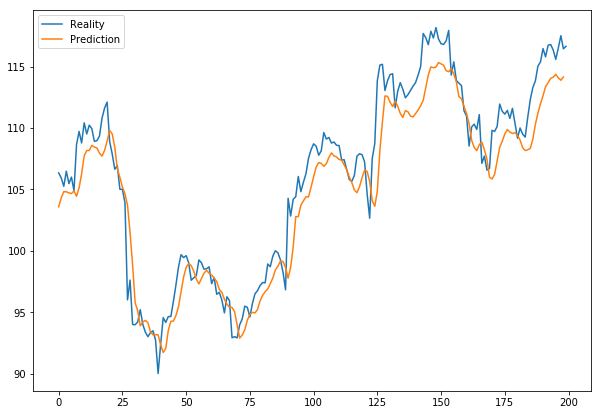

In [26]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data0)[100:200])
plt.plot(trainPredictPlot[100:200])
#plt.plot(testPredictPlot)
plt.show()
# plot baseline and predictions
plt.figure(figsize=(10,7)) 
l1,=plt.plot(scaler.inverse_transform(data0)[-200:])
#plt.plot(trainPredictPlot[100:200])
l2,=plt.plot(testPredictPlot[-200:])
plt.legend(handles = [l1, l2,], labels = ['Reality', 'Prediction'], loc = 'best')
plt.show()